In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

def imshow(image):
    plt.imshow(image)

def imshow_grayscale(image, extent=None):
    plt.imshow(image, cmap="gray", extent=extent)

def imshow_grayscale_m(images, extent=None):
    imshow_grayscale(np.concatenate(images, axis=1), extent)


%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
from ps1_python.find_circles import find_circles
from ps1_python.hough_circles_acc import hough_circles_acc
from ps1_python.hough_lines_acc import hough_lines_acc
from ps1_python.hough_lines_draw import hough_lines_draw
from ps1_python.hough_peaks import hough_peaks

### 1) Load the input and generate an edge image

Load grayscale image (input/ps1-input0.png) as img and generate an edge image – which is a binary image with white pixels (1) on the edges and black pixels (0) elsewhere

128 240 16


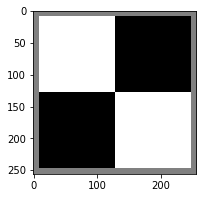

In [107]:
figsize(3, 3)
im = cv2.imread("ps1_python/input/ps1-input0.png", cv2.IMREAD_GRAYSCALE)
imshow_grayscale(im)
print(im[0, 0], im[50, 50], im[50, 200])

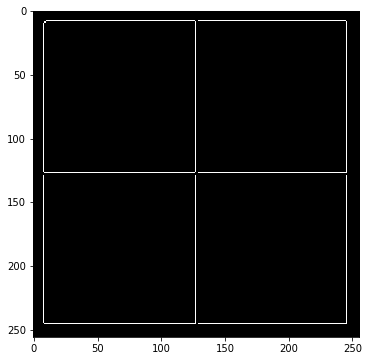

In [108]:
figsize(6, 6)
c = cv2.Canny(im, 10, 200)  # all the threshold params I tried work
imshow_grayscale(c)


### 2) Implement a Hough Transform method for finding lines.

a) Write a function hough_lines_acc that computes the Hough Transform for lines and produces an accumulator array. 

In [69]:
np.sum(c > 0)

1406

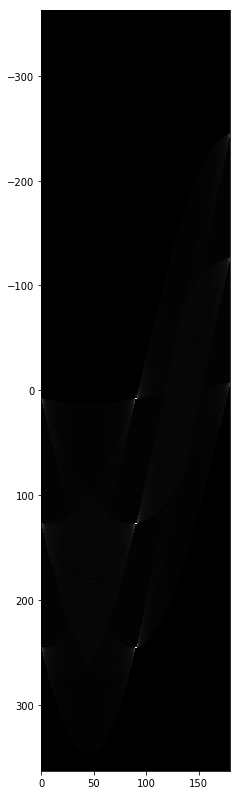

In [83]:
figsize(14, 14)
h, max_rho = hough_lines_acc(c)
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))


In [84]:
sorted([(x, rh-max_rho, th) for (rh, th), x in np.ndenumerate(h)], reverse=True)[:20]


[(255, 245, 90),
 (255, 245, 0),
 (254, 127, 90),
 (254, 127, 0),
 (252, 8, 90),
 (252, 8, 0),
 (65, 246, 89),
 (65, 246, 1),
 (65, 128, 89),
 (65, 128, 1),
 (64, 242, 91),
 (64, 130, 89),
 (64, 130, 1),
 (64, 126, 91),
 (64, 124, 91),
 (64, 11, 89),
 (64, 11, 1),
 (64, 9, 89),
 (64, 9, 1),
 (64, 7, 91)]

b) Write a function hough_peaks that finds indices of the accumulator array (here line parameters) that correspond to local maxima. 

[(245, 0), (245, 90), (127, 0), (127, 90), (8, 0), (8, 90)]

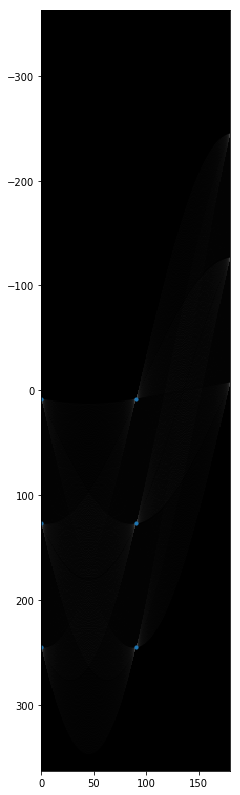

In [85]:
figsize(14, 14)

peaks = hough_peaks(h, 10)
peaks = [(rh-max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


c) Write a function hough_lines_draw to draw color lines that correspond to peaks found in the accumulator array.

(256, 0)

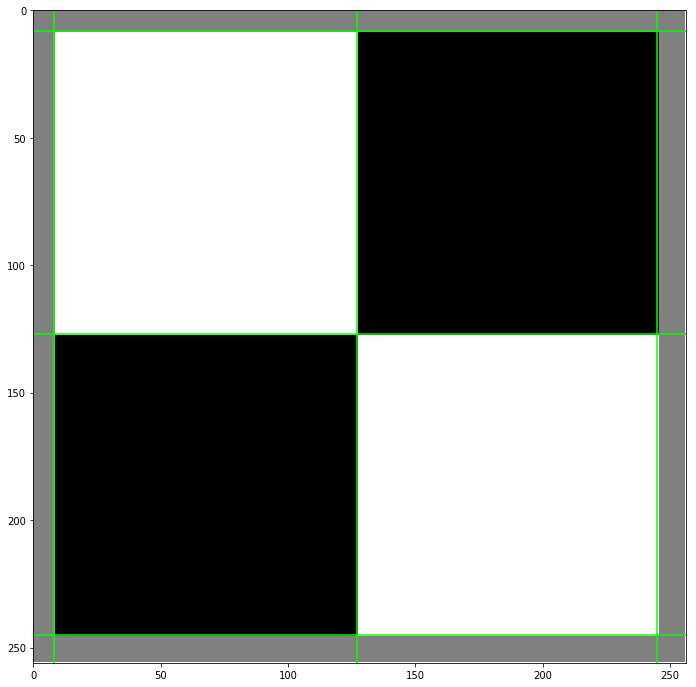

In [86]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1])
plt.gca().set_ylim(im.shape[0], 0)

### 3) Now we’re going to add some noise.

a) Use ps1-input0-noise.png - same image as before, but with noise. Compute a modestly smoothed version of this image by using a Gaussian filter. Make σ at least a few pixels big.


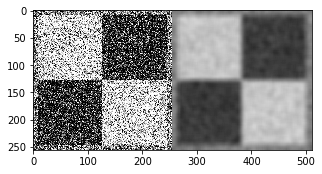

In [148]:
figsize(5, 5)

im = cv2.imread("ps1_python/input/ps1-input0-noise.png", cv2.IMREAD_GRAYSCALE)
im_smooth = cv2.GaussianBlur(im, (15, 15), 5.)

imshow_grayscale_m((im, im_smooth))


b) Using an edge operator of your choosing, create a binary edge image for both the original image (ps1-input0-noise.png) and the smoothed version above.


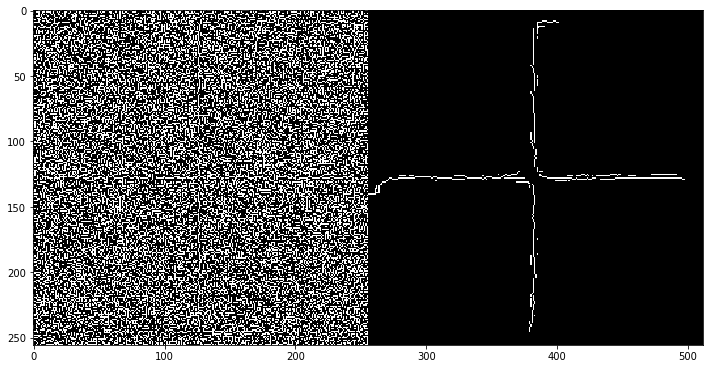

In [149]:
figsize(12, 12)
c = cv2.Canny(im, 10, 100)
c_smooth = cv2.Canny(im_smooth, 10, 100)
imshow_grayscale_m((c, c_smooth))


c) Now apply your Hough method to the smoothed version of the edge image. Your goal is to adjust the filtering, edge finding, and Hough algorithms to find the lines as best you can in this test case.


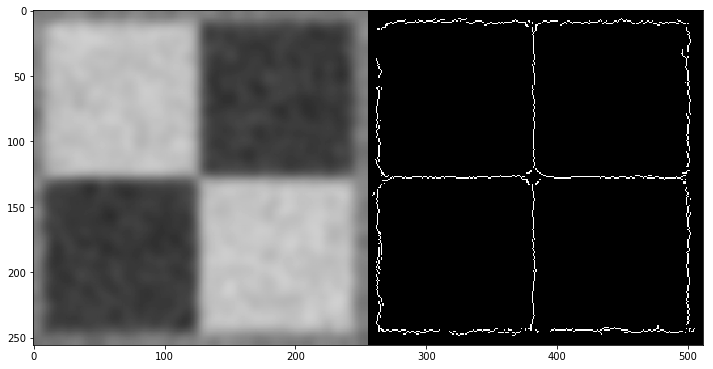

In [177]:
figsize(12, 12)

im_smooth = cv2.GaussianBlur(im, (31, 31), 4.5)
c_smooth = cv2.Canny(im_smooth, 25, 50)
imshow_grayscale_m((im_smooth, c_smooth))


[(126, 0),
 (127, 90),
 (244, 0),
 (9, 90),
 (244, 90),
 (7, 0),
 (-241, 179),
 (-5, 179)]

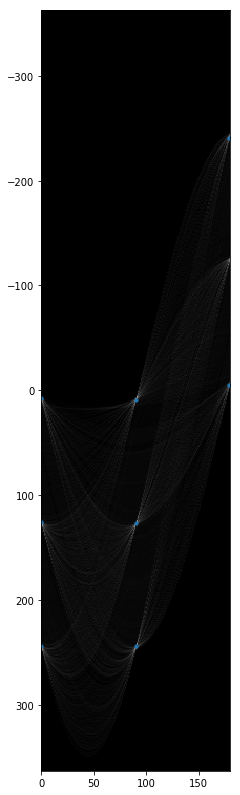

In [181]:
figsize(14, 14)

h, max_rho = hough_lines_acc(c_smooth)
peaks = hough_peaks(h, 10)
peaks = [(rh-max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


(256, 0)

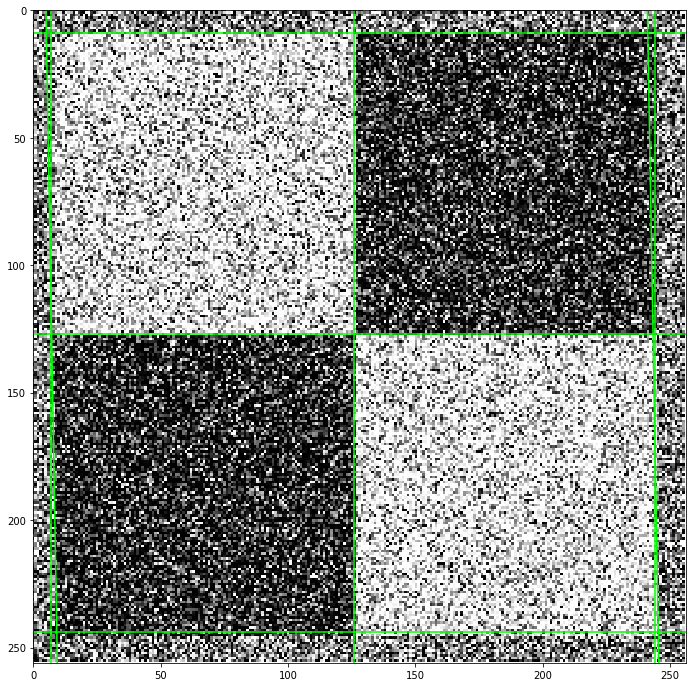

In [182]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1])
plt.gca().set_ylim(im.shape[0], 0)

### 4) For this question use: ps1-input1.png, this image has objects in it whose boundaries are circles (coins) or lines (pens)

a) For this question  you’re still finding lines. Load/create a monochrome version of the image (you can pick a single color channel or use a built-in color to grayscale conversion function), and compute a modestly smoothed version of this image by using a Gaussian filter. Make σ at least a few pixels big.

b) Create an edge image for the smoothed version above.

c) Apply your Hough algorithm to the edge image to find lines along the pens. Draw the lines in color on the  original monochrome (not edge) image. The lines can extend to the edges of the image.

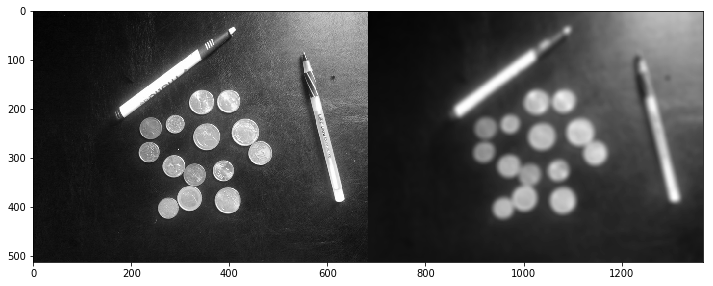

In [3]:
figsize(12, 12)

im = cv2.imread("ps1_python/input/ps1-input1.png", cv2.IMREAD_GRAYSCALE)
im_smooth = cv2.GaussianBlur(im, (15, 15), 5.)

imshow_grayscale_m((im, im_smooth))


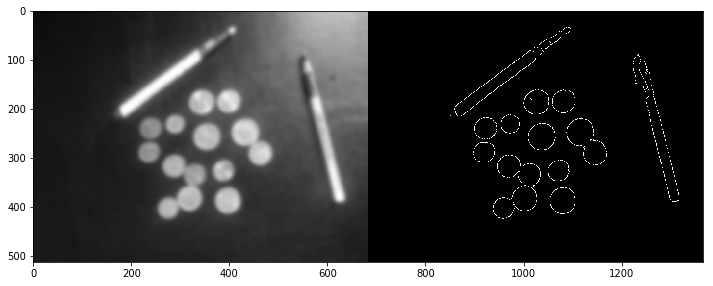

In [37]:
figsize(12, 12)

im_smooth = cv2.GaussianBlur(im, (21, 21), 4)
c_smooth = cv2.Canny(im_smooth, 5, 55)
imshow_grayscale_m((im_smooth, c_smooth))


[(-524, 166), (262, 53), (-505, 166), (284, 53)]

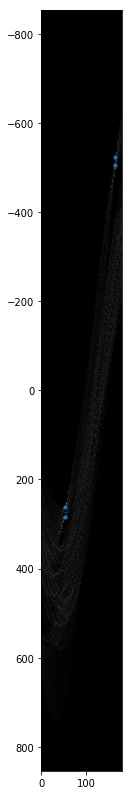

In [38]:
figsize(14, 14)

h, max_rho = hough_lines_acc(c_smooth)
peaks = hough_peaks(h, 10, 100, (25, 10))
peaks = [(rh - max_rho, th) for rh, th in peaks]

fig = plt.figure()
imshow_grayscale(h, extent=(0, 180, max_rho, -max_rho))
y, x = zip(*peaks)
plt.scatter(x, y, s=10)
plt.gca().set_xlim(0, 180)

peaks


(511, 0)

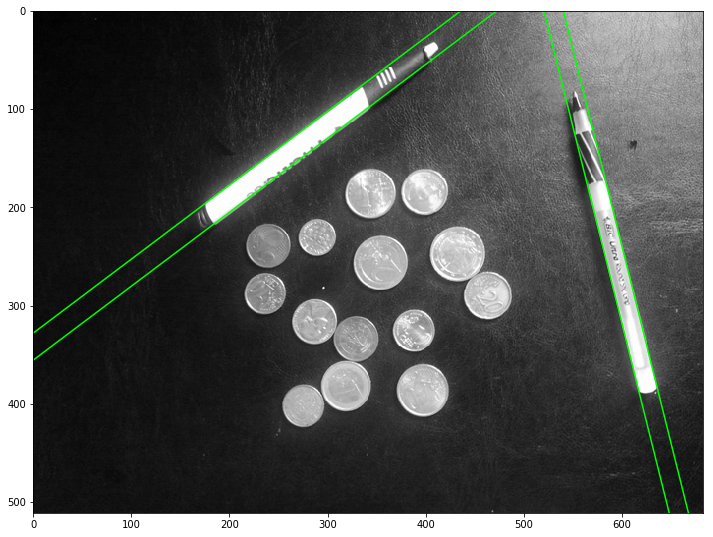

In [39]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1] - 1)
plt.gca().set_ylim(im.shape[0] - 1, 0)


### 5) Now write a circle finding version of the Hough transform. 

You can implement either the single point method or the point plus gradient method. WARNING: This part may be hard!!! Leave extra time!

a) Implement hough_circles_acc to compute the accumulator array for a given radius.
b) Implement a function  find_circles that combines the above two steps, searching for circles within a given radius range, and returns circle centers along with their radii:
        [centers, radii] = find_circles(img_edges, [20 50]);

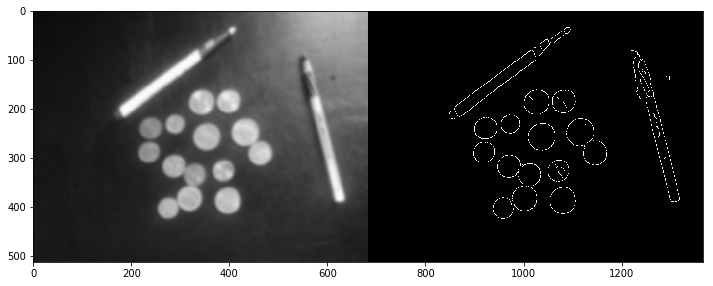

In [119]:
figsize(12, 12)

im = cv2.imread("ps1_python/input/ps1-input1.png", cv2.IMREAD_GRAYSCALE)

im_smooth = cv2.GaussianBlur(im, (21, 21), 3)
c_smooth = cv2.Canny(im_smooth, 5, 55)
imshow_grayscale_m((im_smooth, c_smooth))


  230   290 50.000
  328   387 27.000


array([[230, 290]])

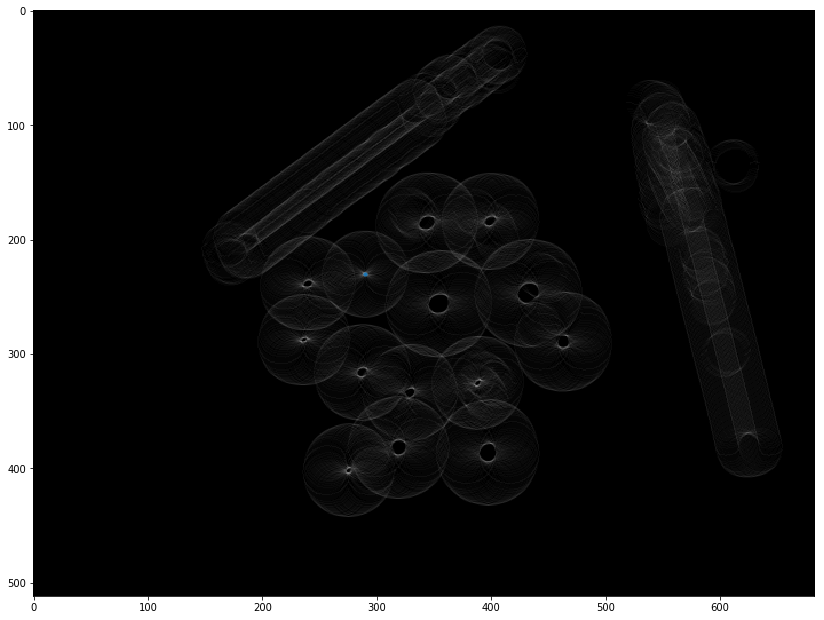

In [122]:
figsize(14, 14)

h = hough_circles_acc(c_smooth, 19)
peaks = hough_peaks(h, 10, 40, verbose=True)

fig = plt.figure()
h_norm = h - np.min(h)
h_norm = np.round(h_norm * (255 / np.max(h_norm))).astype("uint8")
imshow_grayscale(h_norm)

if len(peaks) > 0:
    y, x = zip(*peaks)
    plt.scatter(x, y, s=10)
    # plt.gca().set_xlim(0, 180)

peaks

(511, 0)

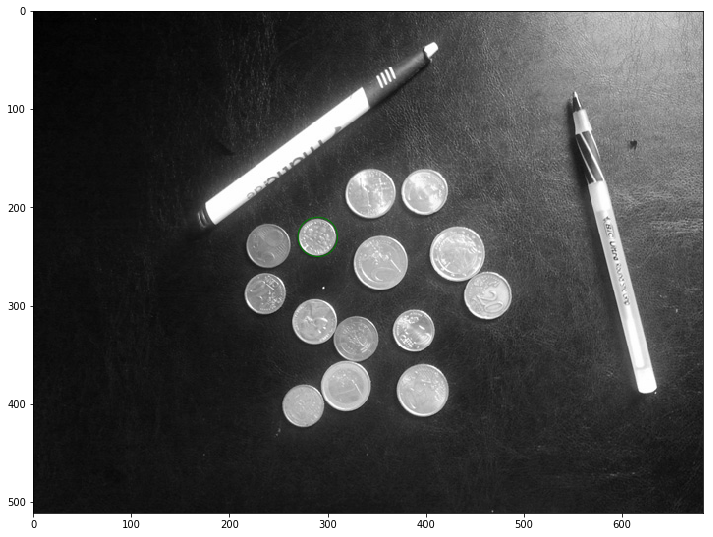

In [123]:
figsize(12, 12)

imshow_grayscale(im)

ax = plt.gcf().gca()

for x, y in peaks:
    circle = plt.Circle((y, x), 20, edgecolor='g', facecolor="none")
    ax.add_artist(circle)

plt.gca().set_xlim(0, im.shape[1] - 1)
plt.gca().set_ylim(im.shape[0] - 1, 0)


In [124]:
%%time

figsize(12, 12)

circles = find_circles(c_smooth, range(19, 50))

CPU times: user 8.06 s, sys: 99.2 ms, total: 8.16 s
Wall time: 8.55 s


(511, 0)

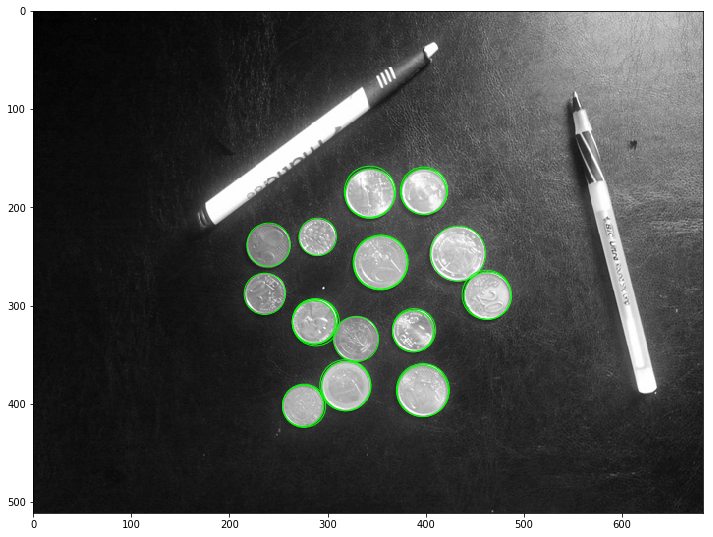

In [126]:
imshow_grayscale(im)
ax = plt.gcf().gca()
for radius, peaks in circles:
    for y, x in peaks:
        circle = plt.Circle((x, y), radius, edgecolor='#00ff00', facecolor="none")
        ax.add_artist(circle)

plt.gca().set_xlim(0, im.shape[1] - 1)
plt.gca().set_ylim(im.shape[0] - 1, 0)


### 6) More realistic images. 

Now that you have Hough methods working, we’re going to try them on images that have clutter in them - visual elements that are not part of the objects to be detected. The image to use is ps1-input2.png.

a) Apply your line finder. Use a smoothing filter and edge detector that seems to work best in terms of finding all the pen edges. Don’t worry (until b) about whether you are finding other lines.

b) Likely the last step found lines that are not the boundaries of the pens. Attempt to find only the lines that are the *boundaries* of the pen.  Three operations you need to try are better thresholding in finding the lines (look for stronger edges), checking the minimum length of the line, looking for nearby parallel lines.


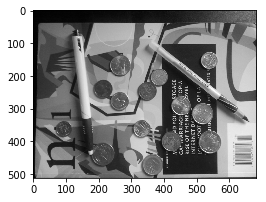

In [128]:
figsize(4, 4)

im = cv2.imread("ps1_python/input/ps1-input2.png", cv2.IMREAD_GRAYSCALE)

imshow_grayscale(im)


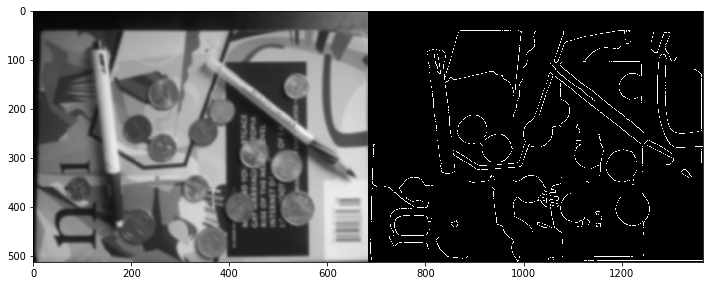

In [242]:
figsize(12, 12)

im_smooth = cv2.GaussianBlur(im, (31, 31), 2.5)
c_smooth = cv2.Canny(im_smooth, 25, 155)
imshow_grayscale_m((im_smooth, c_smooth))


CPU times: user 526 ms, sys: 58.8 ms, total: 584 ms
Wall time: 591 ms


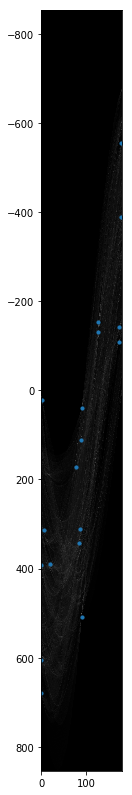

In [251]:
%%time
# cpu time before hough_lines_acc vectorization: 10.7s
# cpu time after hough_lines_acc vectorization: 1.12

figsize(14, 14)

h, max_rho = hough_lines_acc(c_smooth)
peaks = hough_peaks(h, 20, 80, (25, 10))
peaks = [(rh - max_rho, th) for rh, th in peaks]

fig = plt.figure()
h_norm = h - np.min(h)
h_norm = np.round(h_norm * (255 / np.max(h_norm))).astype("uint8")
imshow_grayscale(h_norm, extent=(0, 180, max_rho, -max_rho))

if len(peaks) > 0:
    y, x = zip(*peaks)
    plt.scatter(x, y, s=10)
    plt.gca().set_xlim(0, 180)


(511, 0)

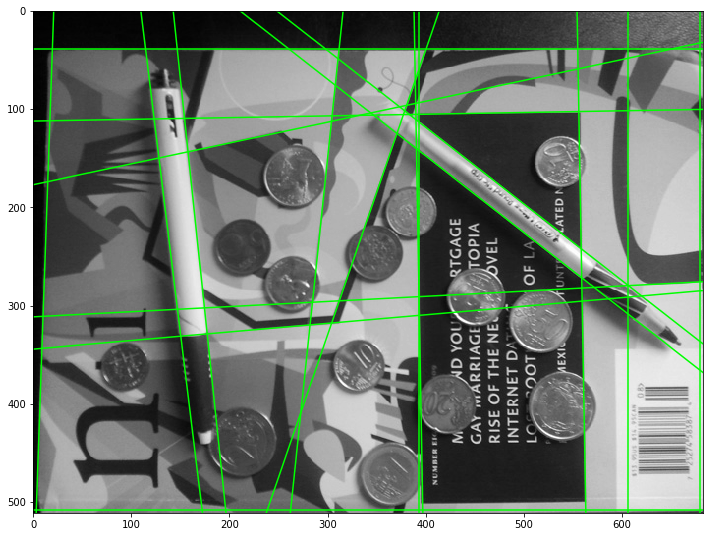

In [252]:
figsize(12, 12)

imshow_grayscale(im)
hough_lines_draw(im, peaks)

plt.gca().set_xlim(0, im.shape[1] - 1)
plt.gca().set_ylim(im.shape[0] - 1, 0)


In [267]:
from ps1_python.hough_peaks import pen_lines_only

(511, 0)

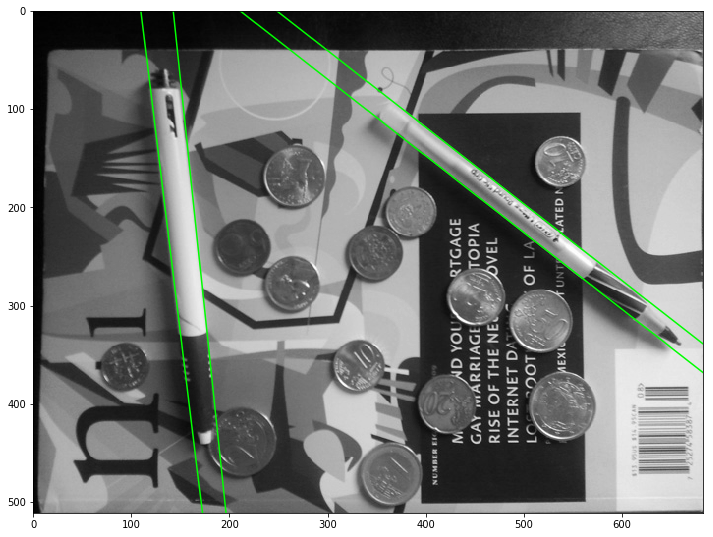

In [272]:
figsize(12, 12)

new_peaks = pen_lines_only(peaks, angle_threshold=2, distance_threshold=(10, 40))

imshow_grayscale(im)
hough_lines_draw(im, new_peaks)

plt.gca().set_xlim(0, im.shape[1] - 1)
plt.gca().set_ylim(im.shape[0] - 1, 0)
